# بيتر والذئب: مقدمة في التعلم المعزز

في هذا الدرس، سنتعلم كيفية تطبيق التعلم المعزز على مشكلة إيجاد المسار. الإعداد مستوحى من الحكاية الموسيقية [بيتر والذئب](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) التي ألفها الموسيقار الروسي [سيرجي بروكوفييف](https://en.wikipedia.org/wiki/Sergei_Prokofiev). إنها قصة عن الشاب بيتر، الذي يخرج بشجاعة من منزله إلى الغابة لمطاردة ذئب. سنقوم بتدريب خوارزميات تعلم الآلة التي ستساعد بيتر على استكشاف المنطقة المحيطة وبناء خريطة تنقل مثالية.

أولاً، دعونا نستورد مجموعة من المكتبات المفيدة:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## نظرة عامة على التعلم المعزز

**التعلم المعزز** (RL) هو تقنية تعلم تتيح لنا اكتساب سلوك مثالي لوكيل **agent** في بيئة **environment** معينة من خلال إجراء العديد من التجارب. يجب أن يكون لدى الوكيل في هذه البيئة **هدف** محدد بواسطة **دالة المكافأة**.

## البيئة

للتبسيط، دعونا نعتبر أن عالم بيتر عبارة عن لوحة مربعة بحجم `width` x `height`. كل خلية في هذه اللوحة يمكن أن تكون واحدة من التالي:
* **أرض**، يمكن لبيتر والمخلوقات الأخرى المشي عليها
* **ماء**، من الواضح أنه لا يمكنك المشي عليه
* **شجرة** أو **عشب** - مكان يمكنك أن تستريح فيه
* **تفاحة**، وهي تمثل شيئًا يسر بيتر العثور عليه لإطعام نفسه
* **ذئب**، وهو خطر ويجب تجنبه

للعمل مع البيئة، سنقوم بتعريف فئة تسمى `Board`. ولتجنب ازدحام هذا الدفتر بالكود، قمنا بنقل جميع الأكواد المتعلقة بالعمل مع اللوحة إلى وحدة منفصلة تسمى `rlboard`، والتي سنقوم الآن باستيرادها. يمكنك الاطلاع داخل هذه الوحدة للحصول على مزيد من التفاصيل حول آليات التنفيذ الداخلية.


لنقم الآن بإنشاء لوحة عشوائية ونرى كيف تبدو:


In [4]:
# code block 1

## الإجراءات والسياسة

في مثالنا، سيكون هدف بيتر هو العثور على تفاحة، مع تجنب الذئب والعوائق الأخرى. قم بتعريف هذه الإجراءات كقاموس، واربطها بأزواج من تغييرات الإحداثيات المقابلة.


In [5]:
# code block 2

استراتيجية وكيلنا (بيتر) تُعرّف بما يُسمى **السياسة**. دعونا نأخذ بعين الاعتبار أبسط سياسة تُسمى **المشي العشوائي**.

## المشي العشوائي

دعونا نحل مشكلتنا أولاً من خلال تنفيذ استراتيجية المشي العشوائي.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## وظيفة المكافأة

لجعل سياستنا أكثر ذكاءً، نحتاج إلى فهم أي الحركات "أفضل" من غيرها.


In [8]:
#code block 5

## التعلم باستخدام Q-Learning

قم بإنشاء جدول Q، أو مصفوفة متعددة الأبعاد. بما أن لوحتنا لها أبعاد `width` x `height`، يمكننا تمثيل جدول Q باستخدام مصفوفة numpy ذات الشكل `width` x `height` x `len(actions)`:


In [9]:
# code block 6

مرر جدول Q إلى دالة `plot` لعرض الجدول على اللوحة:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## جوهر Q-Learning: معادلة بيلمان وخوارزمية التعلم

اكتب كودًا شبه برمجي لخوارزمية التعلم الخاصة بنا:

* قم بتهيئة جدول Q بحيث يحتوي على أرقام متساوية لجميع الحالات والإجراءات
* قم بتعيين معدل التعلم $\alpha\leftarrow 1$
* كرر المحاكاة عدة مرات
   1. ابدأ من موقع عشوائي
   1. كرر
        1. اختر إجراءً $a$ في الحالة $s$
        2. نفذ الإجراء بالانتقال إلى حالة جديدة $s'$
        3. إذا واجهنا شرط نهاية اللعبة، أو إذا كان إجمالي المكافأة صغيرًا جدًا - اخرج من المحاكاة  
        4. احسب المكافأة $r$ في الحالة الجديدة
        5. قم بتحديث دالة Q وفقًا لمعادلة بيلمان: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. قم بتحديث إجمالي المكافأة وقلل $\alpha$.

## الاستغلال مقابل الاستكشاف

أفضل نهج هو تحقيق توازن بين الاستكشاف والاستغلال. كلما تعلمنا المزيد عن بيئتنا، سنكون أكثر ميلًا لاتباع المسار الأمثل، ومع ذلك، يجب اختيار المسار غير المستكشف بين الحين والآخر.

## تنفيذ Python

الآن نحن جاهزون لتنفيذ خوارزمية التعلم. قبل ذلك، نحتاج أيضًا إلى وظيفة تقوم بتحويل الأرقام العشوائية في جدول Q إلى متجه من الاحتمالات للإجراءات المقابلة:


In [10]:
# code block 7

نضيف كمية صغيرة من `eps` إلى المتجه الأصلي لتجنب القسمة على 0 في الحالة الأولية، عندما تكون جميع مكونات المتجه متطابقة.

خوارزمية التعلم الفعلية التي سنقوم بتشغيلها لـ 5000 تجربة، والتي تُعرف أيضًا باسم **epochs**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

بعد تنفيذ هذا الخوارزمية، يجب تحديث جدول Q بالقيم التي تحدد جاذبية الإجراءات المختلفة في كل خطوة. تصور الجدول هنا:


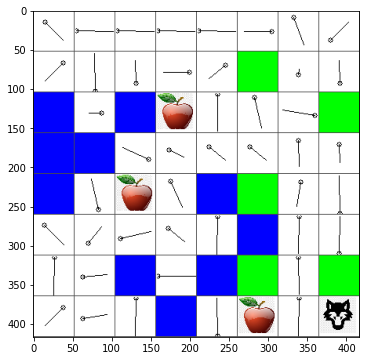

In [43]:
m.plot(Q)

## التحقق من السياسة

نظرًا لأن جدول Q يعرض "جاذبية" كل إجراء في كل حالة، فمن السهل جدًا استخدامه لتحديد التنقل الفعّال في عالمنا. في أبسط الحالات، يمكننا ببساطة اختيار الإجراء الذي يتوافق مع أعلى قيمة في جدول Q:


In [13]:
# code block 9

2

إذا جربت الكود أعلاه عدة مرات، قد تلاحظ أنه أحيانًا "يتوقف" عن العمل، وتحتاج إلى الضغط على زر الإيقاف في الدفتر لمقاطعته.

> **المهمة 1:** قم بتعديل دالة `walk` لتحديد الحد الأقصى لطول المسار بعدد معين من الخطوات (على سبيل المثال، 100)، وراقب الكود أعلاه يعيد هذه القيمة من وقت لآخر.

> **المهمة 2:** قم بتعديل دالة `walk` بحيث لا تعود إلى الأماكن التي زارتها مسبقًا. هذا سيمنع `walk` من التكرار في نفس الأماكن، ومع ذلك، قد ينتهي الأمر بالوكيل "محاصرًا" في موقع لا يستطيع الهروب منه.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


## التحقيق في عملية التعلم


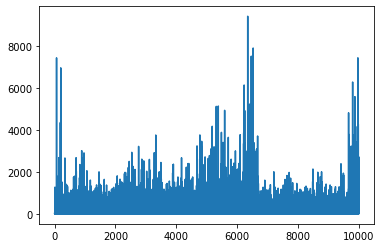

In [57]:
plt.plot(lpath)

## التمرين
## عالم أكثر واقعية لقصة بيتر والذئب



---

**إخلاء المسؤولية**:  
تمت ترجمة هذا المستند باستخدام خدمة الترجمة الآلية [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو عدم دقة. يجب اعتبار المستند الأصلي بلغته الأصلية هو المصدر الموثوق. للحصول على معلومات حساسة أو هامة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة تنشأ عن استخدام هذه الترجمة.
